# GLWT MNIST


* Atividade PEL219 - GLWT MNIST - Gabriel Melo. Matrícula: 125.304-6

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

from tqdm import tqdm
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
y_train = to_categorical(y_train)

In [11]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000,))

In [28]:
def train_glwt(model: Sequential, X: np.array, Y: np.array, optimizer="adam", loss="categorical_crossentropy", metrics="categorical_accuracy", _epochs=10, _validation_split=.1):
    histories = []
    
    for i in range(1, len(model.layers)):
        for layer in model.layers[:i]:
            layer.trainable = False
        for layer in model.layers[i:]:
            layer.trainable = True

        model.compile(optimizer, loss, metrics=[metrics])        
        histories.append(model.fit(x=x_train, y=y_train, epochs=_epochs, validation_split=_validation_split))

    return histories

In [29]:
model = Sequential() 
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(785, activation="relu"))
model.add(Dense(480, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(40, activation="relu"))
model.add(Dense(10, activation="softmax"))  # digit numbers


/home/melo/coding/machine-learning/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
hist = train_glwt(model, x_train, y_train)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.9349 - loss: 0.2130 - val_categorical_accuracy: 0.9698 - val_loss: 0.1039
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.9708 - loss: 0.0956 - val_categorical_accuracy: 0.9753 - val_loss: 0.0806
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.9790 - loss: 0.0692 - val_categorical_accuracy: 0.9767 - val_loss: 0.0788
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.9841 - loss: 0.0535 - val_categorical_accuracy: 0.9792 - val_loss: 0.0743
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.9866 - loss: 0.0445 - val_categorical_accuracy: 0.9755 - val_loss: 0.0871
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.9889 - loss: 0.0366 - val_categorical_accuracy: 0.9805 - val_loss: 0.0769
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy

## Testing

In [31]:
results = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [32]:
results_class = np.argmax(results, axis=1)

In [33]:
accuracy_score(results_class, y_test), precision_score(results_class, y_test, average="weighted"), recall_score(results_class, y_test, average="weighted"), f1_score(results_class, y_test, average="weighted")

(0.9845, 0.9845092932519303, 0.9845, 0.9844944084097788)

In [34]:
print(classification_report(y_test, results_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Axes: >

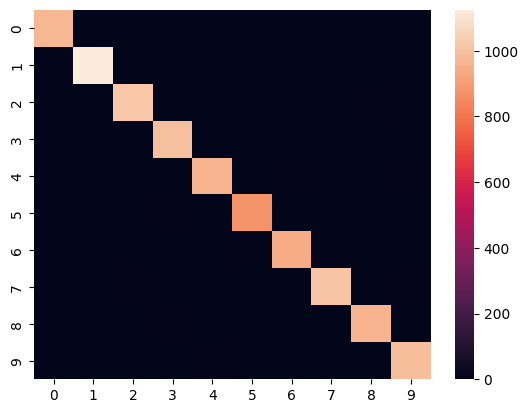

In [35]:
sns.heatmap(confusion_matrix(y_test, results_class))

## Training data (Displaying only the last layer)

In [36]:
df = pd.DataFrame(hist[-1].history)

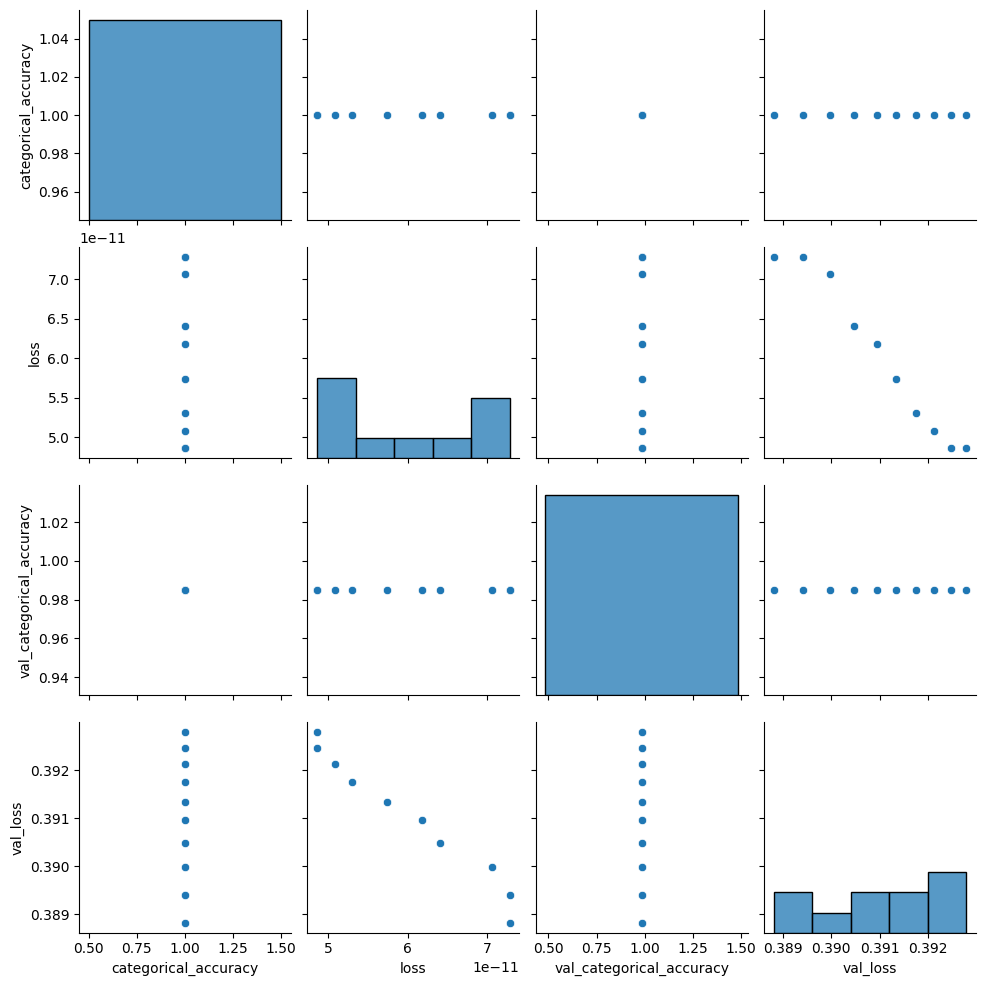

In [37]:
sns.pairplot(df)

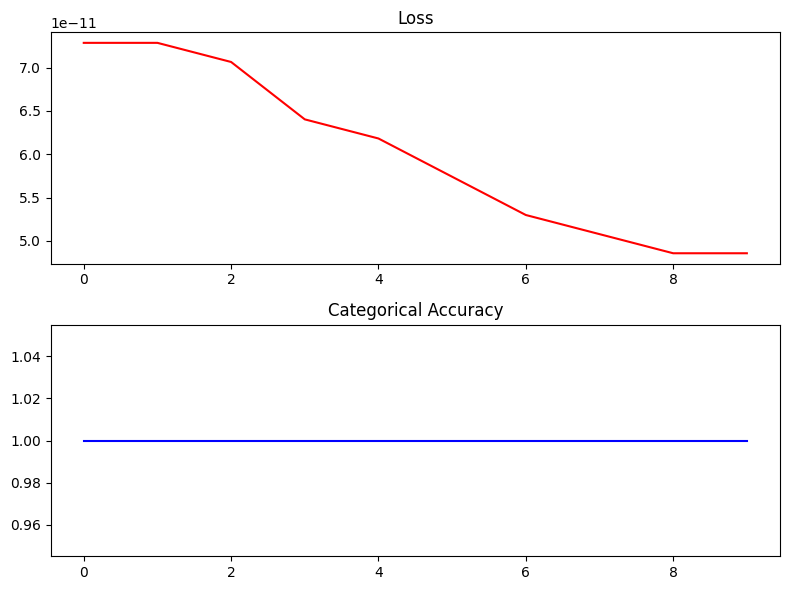

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

ax[0].plot(df['loss'], color='red')
ax[0].set_title("Loss")

ax[1].plot(df['categorical_accuracy'], color='blue')
ax[1].set_title("Categorical Accuracy")

fig.tight_layout()